# Sales Insights

Atliq Hardware is a company which supplies computer hardwares and peripherals to many of the clients across the India headquartered in Delhi, India. They have a lot of regional offices throughout the india.


Results of Analysis:  
1. The total Revenue generated is: **984869300.5** INR
2. The total profit made : **24657068.41** INR
3. The total quantities sold:  **2429282** units
5. Revenue generated by markets:
   - The TOp 5 markets by revenue contributions are :
      1. **Delhi**
      2. **Mumbai**
      3. **Ahemdabad**
      4. **Bhopal**
      5. **Nagpur**
   - Similiarly top 5 markets with lowest reveune contributions are: **Bengaluru**, **Bhubaneswor**, **Surat**, **Lucknow** and **Patna**
4. Revenue by Markets and Customer Type:

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('ggplot')

In [2]:
# loading all datas
transactions = pd.read_csv('data/transactions.csv')
customers = pd.read_csv('data/customers.csv')
date = pd.read_csv('data/date.csv')
markets = pd.read_csv('data/markets.csv')
products = pd.read_csv('data/products.csv')

In [3]:
# read transactions data
print('transactions data shape/size: ', transactions.shape)
transactions.head()

transactions data shape/size:  (148395, 11)


,Unnamed: 0,product_code,customer_code,market_code,order_date,sales_qty,sales_amount,currency,profit_margin_percentage,profit_margin,cost_price
0,0,Prod279,Cus020,Mark011,2017-10-11,1,102.0,INR,0.39,39.78,62.22
1,1,Prod279,Cus020,Mark011,2017-10-18,1,102.0,INR,-0.12,-12.24,114.24
2,2,Prod279,Cus020,Mark011,2017-10-19,1,102.0,INR,0.29,29.58,72.42
3,3,Prod279,Cus020,Mark011,2017-11-08,1,102.0,INR,0.36,36.72,65.28
4,4,Prod279,Cus020,Mark011,2018-03-09,1,102.0,INR,-0.35,-35.70,137.70


In [4]:
transactions['currency'].unique() 

array(['INR', 'USD'], dtype=object)

it seems two unique currencies,first is INR (Indian Ruppes) and second one is USD (US dollar). we will convert USD to INR later.

In [5]:
# customer data
print('customers data shape/size: ', customers.shape)
customers.head()

customers data shape/size:  (38, 4)


,Unnamed: 0,customer_code,custmer_name,customer_type
0,0,Cus001,Surge Stores,Brick & Mortar
1,1,Cus002,Nomad Stores,Brick & Mortar
2,2,Cus003,Excel Stores,Brick & Mortar
3,3,Cus004,Surface Stores,Brick & Mortar
4,4,Cus005,Premium Stores,Brick & Mortar


In [6]:
# date data
print('date data size/shape: ', date.shape)
date.head()

date data size/shape:  (1126, 6)


,Unnamed: 0,date,cy_date,year,month_name,date_yy_mmm
0,0,2017-06-01,2017-06-01,2017,June,17-Jun\r
1,1,2017-06-02,2017-06-01,2017,June,17-Jun\r
2,2,2017-06-03,2017-06-01,2017,June,17-Jun\r
3,3,2017-06-04,2017-06-01,2017,June,17-Jun\r
4,4,2017-06-05,2017-06-01,2017,June,17-Jun\r


In [7]:
# market data
print('market data size/shape: ', markets.shape)
markets.head()

market data size/shape:  (17, 4)


,Unnamed: 0,markets_code,markets_name,zone
0,0,Mark001,Chennai,South
1,1,Mark002,Mumbai,Central
2,2,Mark003,Ahmedabad,North
3,3,Mark004,Delhi NCR,North
4,4,Mark005,Kanpur,North


In [8]:
# products data
print('product data shape/size: ', products.shape)
products.head()

product data shape/size:  (279, 3)


,Unnamed: 0,product_code,product_type
0,0,Prod001,Own Brand\r
1,1,Prod002,Own Brand\r
2,2,Prod003,Own Brand\r
3,3,Prod004,Own Brand\r
4,4,Prod005,Own Brand\r


In [9]:
## every dataset contains column Unnamed: 0. let's drop them

transactions.drop('Unnamed: 0', axis=1, inplace=True)
customers.drop('Unnamed: 0', axis=1, inplace=True)
date.drop('Unnamed: 0', axis=1, inplace=True)
markets.drop('Unnamed: 0', axis=1, inplace=True)
products.drop('Unnamed: 0', axis=1, inplace=True)

Now let's see transactions paid with US Dollar (USD)

In [10]:
transactions[transactions['currency']=="USD"]
#df = transactions.copy()
#transactions['sales_amount'] = transactions['sales_amount'].apply(lambda x: x*75.45 if transactions['currency']=="USD")

,product_code,customer_code,market_code,order_date,sales_qty,sales_amount,currency,profit_margin_percentage,profit_margin,cost_price
135937,Prod003,Cus005,Mark004,2017-11-20,59,500.0,USD,0.31,11625.0,25875.0
135938,Prod003,Cus005,Mark004,2017-11-22,36,250.0,USD,0.17,3187.5,15562.5


There are only two transactions with USD. We now convert it to INR. Currently, 1 USD = 75.45 INR (this rates keeps on changing)

In [11]:
transactions.at[135937,'sales_amount'] = transactions.at[135937,'sales_amount']*75.45
transactions.at[135938,'sales_amount'] = transactions.at[135938,'sales_amount']*75.45


In [12]:
transactions[transactions['currency']=="USD"]

,product_code,customer_code,market_code,order_date,sales_qty,sales_amount,currency,profit_margin_percentage,profit_margin,cost_price
135937,Prod003,Cus005,Mark004,2017-11-20,59,37725.0,USD,0.31,11625.0,25875.0
135938,Prod003,Cus005,Mark004,2017-11-22,36,18862.5,USD,0.17,3187.5,15562.5


### 1. Total Revenue Generated

In [13]:
print("The total revenue generated till now:",transactions.sales_amount.sum(), 'INR')

The total revenue generated till now: 984869300.5 INR


### 2. Total Sakes Quantity

In [14]:
print('The total sales quantities till now: ', transactions.sales_qty.sum(),'units')

The total sales quantities till now:  2429282 units


### 3. Total Profit

In [15]:
print('The total profit made till now:', transactions.profit_margin.sum(),'INR')

The total profit made till now: 24657068.41 INR


### 4. Revenue by Market and Revenue contribution % by Markets

In [16]:
df = pd.merge(transactions, markets, left_on='market_code', right_on='markets_code')  # inner join of two dataframes
df_new = pd.merge(df, customers, on = 'customer_code')
#df_new = pd.merge(df_new, products, on = 'product_code')
#df_new = pd.merge(df_new, date, left_on = 'order_date', right_on='date')
print('Shape after merging 3l datasets:', df_new.shape)
df_new.head()

Shape after merging 3l datasets: (148395, 15)


,product_code,customer_code,market_code,order_date,sales_qty,sales_amount,currency,profit_margin_percentage,profit_margin,cost_price,markets_code,markets_name,zone,custmer_name,customer_type
0,Prod279,Cus020,Mark011,2017-10-11,1,102.0,INR,0.39,39.78,62.22,Mark011,Nagpur,Central,Nixon,E-Commerce
1,Prod279,Cus020,Mark011,2017-10-18,1,102.0,INR,-0.12,-12.24,114.24,Mark011,Nagpur,Central,Nixon,E-Commerce
2,Prod279,Cus020,Mark011,2017-10-19,1,102.0,INR,0.29,29.58,72.42,Mark011,Nagpur,Central,Nixon,E-Commerce
3,Prod279,Cus020,Mark011,2017-11-08,1,102.0,INR,0.36,36.72,65.28,Mark011,Nagpur,Central,Nixon,E-Commerce
4,Prod279,Cus020,Mark011,2018-03-09,1,102.0,INR,-0.35,-35.70,137.70,Mark011,Nagpur,Central,Nixon,E-Commerce


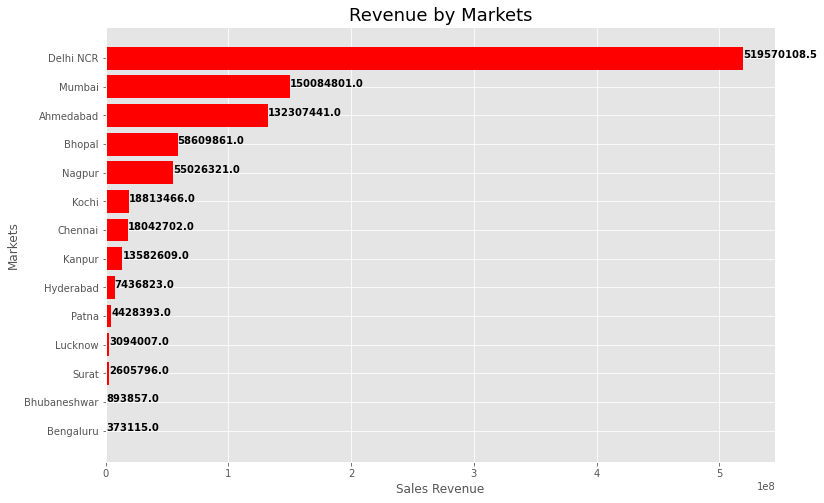

In [17]:
df = df_new.groupby('markets_name')['sales_amount'].sum().reset_index(name='Sales_Revenue').sort_values('Sales_Revenue',ascending=True)

plt.figure(figsize=(12,8))
plt.barh(df['markets_name'], df['Sales_Revenue'], color='red')
for i,v in enumerate(df['Sales_Revenue'].values):
  plt.text(v, i, str(v), fontweight='bold')
plt.title('Revenue by Markets', fontsize=18)
plt.ylabel('Markets', fontsize=12)
plt.xlabel('Sales Revenue', fontsize=12)
plt.grid('True')
plt.savefig("plots/revenuebymarkets.png")
plt.show()

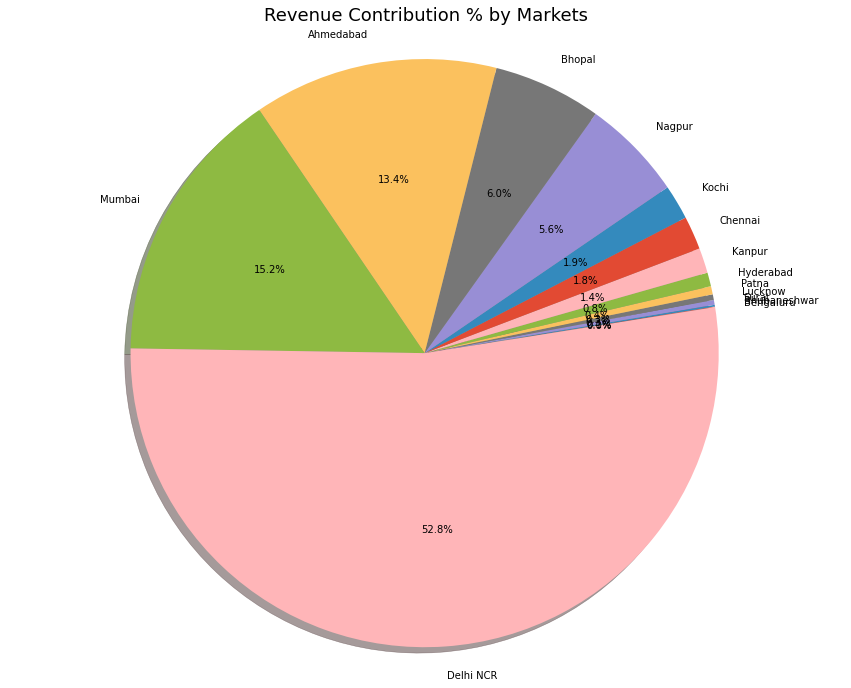

In [18]:
plt.figure(figsize=(15,12))
labels=list(df['markets_name'])
sizes = list(df['Sales_Revenue'])
#colors = ['#66b3ff','#ff9999','#ee4433','#ff8888','#dd3333','#ff4444','#a3a3a3']

plt.pie(sizes, labels=labels,autopct='%1.1f%%', shadow=True, startangle=9 )
plt.title("Revenue Contribution % by Markets", fontsize=18)
plt.axis('equal')
plt.grid(True)
plt.savefig('plots/revenue_contribution_%_by_markets.png')

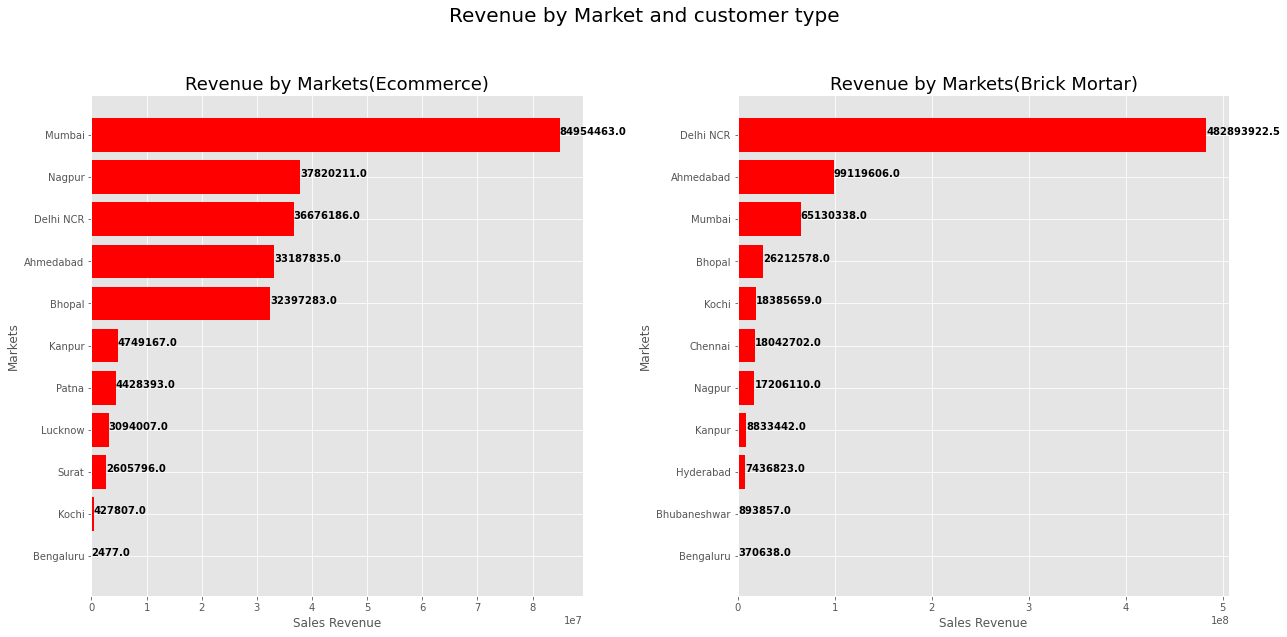

In [19]:
plt.figure(figsize=(18,8))

df = df_new.groupby(['markets_name','customer_type'])['sales_amount'].sum().reset_index(name='Sales_Revenue').sort_values('Sales_Revenue',ascending=True)
rev_market1 = df[df['customer_type']=='E-Commerce']
rev_market2 = df[df['customer_type']=='Brick & Mortar']


plt.suptitle('Revenue by Market and customer type', y=1.1, fontsize=20)
plt.subplot(121)
plt.barh(rev_market1['markets_name'], rev_market1['Sales_Revenue'], color='red')
for i,v in enumerate(rev_market1['Sales_Revenue'].values):
  plt.text(v, i, str(v), fontweight='bold')
plt.title('Revenue by Markets(Ecommerce)', fontsize=18)
plt.ylabel('Markets', fontsize=12)
plt.xlabel('Sales Revenue', fontsize=12)
plt.grid('True')
#plt.savefig("plots/revenuebymarkets.png")

plt.subplot(122)
plt.barh(rev_market2['markets_name'], rev_market2['Sales_Revenue'], color='red')
for i,v in enumerate(rev_market2['Sales_Revenue'].values):
  plt.text(v, i, str(v), fontweight='bold')
plt.title('Revenue by Markets(Brick Mortar)', fontsize=18)
plt.ylabel('Markets', fontsize=12)
plt.xlabel('Sales Revenue', fontsize=12)
plt.grid('True')
plt.savefig("plots/revenuebymarkets_&_cust_type.png")
plt.tight_layout()
plt.show()

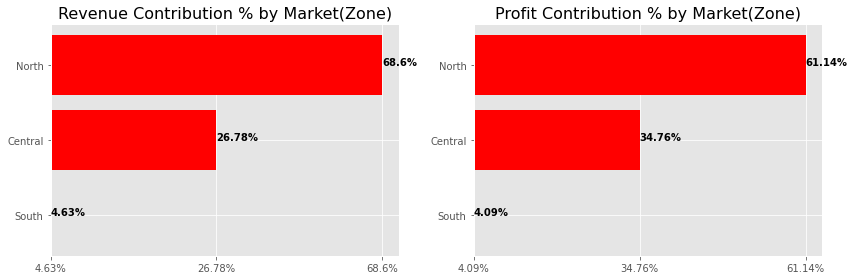

In [20]:
zone_df = df_new.groupby('zone').agg(
                               Revenue = ('sales_amount','sum'),
                               Profit_Margin = ('profit_margin','sum'))
zone_df['Revenue contribution %'] = round((zone_df['Revenue']*100)/sum(zone_df['Revenue']),2)
zone_df['profit margin %'] = round((zone_df['Profit_Margin']*100)/sum(zone_df['Profit_Margin']),2)
zone_df['Revenue contribution %'] = zone_df['Revenue contribution %'].astype(str)+'%' # add % sign
zone_df['profit margin %'] = zone_df['profit margin %'].astype(str)+'%'
zone_df = zone_df.sort_values('Revenue')

# subplots
plt.figure(figsize=(12,4))
plt.subplot(121)
for i,v in enumerate(zone_df['Revenue contribution %'].values):
    plt.text(v, i, str(v), fontweight='bold')
plt.barh(zone_df.index, zone_df['Revenue contribution %'], color='red')
plt.title('Revenue Contribution % by Market(Zone)', fontsize=16)

plt.subplot(122)
for i,v in enumerate(zone_df['profit margin %'].values):
    plt.text(v, i, str(v), fontweight='bold')
plt.barh(zone_df.index, zone_df['profit margin %'], color='red')
plt.title('Profit Contribution % by Market(Zone)', fontsize=16)
plt.savefig('plots/Revenue_profit_contr_by_market(zone).png')
plt.tight_layout()
plt.show()

### 5. Profits and Profit % Contribution by Markets

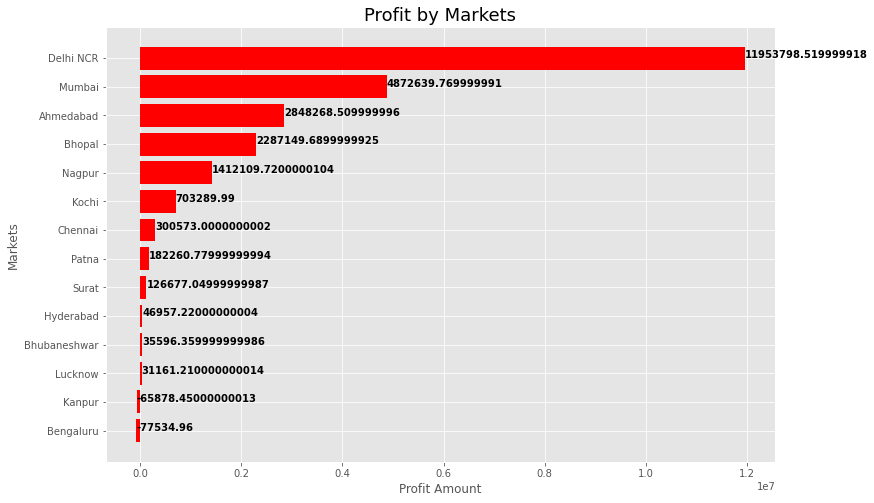

In [21]:
profits_df = df_new.groupby('markets_name')['profit_margin'].sum().reset_index(name='Profit Amount').sort_values('Profit Amount', ascending=True)
profits_df['Profit contribution %'] = round((profits_df['Profit Amount']*100)/sum(profits_df['Profit Amount']),2)
#profits_df['Profit contribution %'] = profits_df['Profit contribution %'].astype(str)+'%'

plt.figure(figsize=(12,8))
plt.barh(profits_df['markets_name'], profits_df['Profit Amount'], color='red')
for i,v in enumerate(profits_df['Profit Amount'].values):
    plt.text(v, i, str(v), fontweight='bold')
plt.title('Profit by Markets', fontsize=18)
plt.ylabel('Markets', fontsize=12)
plt.xlabel('Profit Amount', fontsize=12)
plt.grid('True')
plt.savefig("plots/profit_by_markets.png")
plt.show()

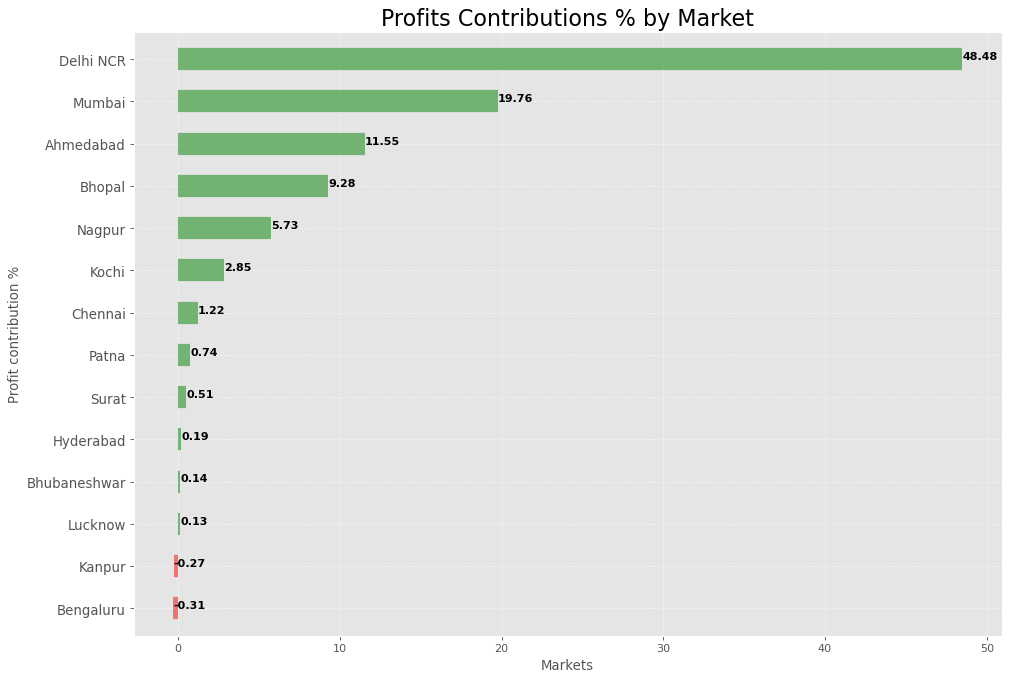

In [22]:
profits_df['colors'] = ['red' if x < 0 else 'green' for x in profits_df['Profit Amount']]
profits_df = profits_df.reset_index()
# Draw plot
plt.figure(figsize=(14,10), dpi= 80)
for i,v in enumerate(profits_df['Profit contribution %'].values):
    plt.text(v, i, str(v), fontweight='bold')
plt.hlines(y=profits_df.index, xmin=0, xmax=profits_df['Profit contribution %'], color=profits_df.colors, alpha=0.5, linewidth=20)

# Decorations
plt.gca().set(ylabel='Profit contribution %', xlabel='Markets')
plt.yticks(profits_df.index, profits_df.markets_name, fontsize=12)
plt.title('Profits Contributions % by Market', fontdict={'size':20})
plt.grid(linestyle='--', alpha=0.5)
plt.savefig('plots/proft%_by_markets.png')
plt.show()

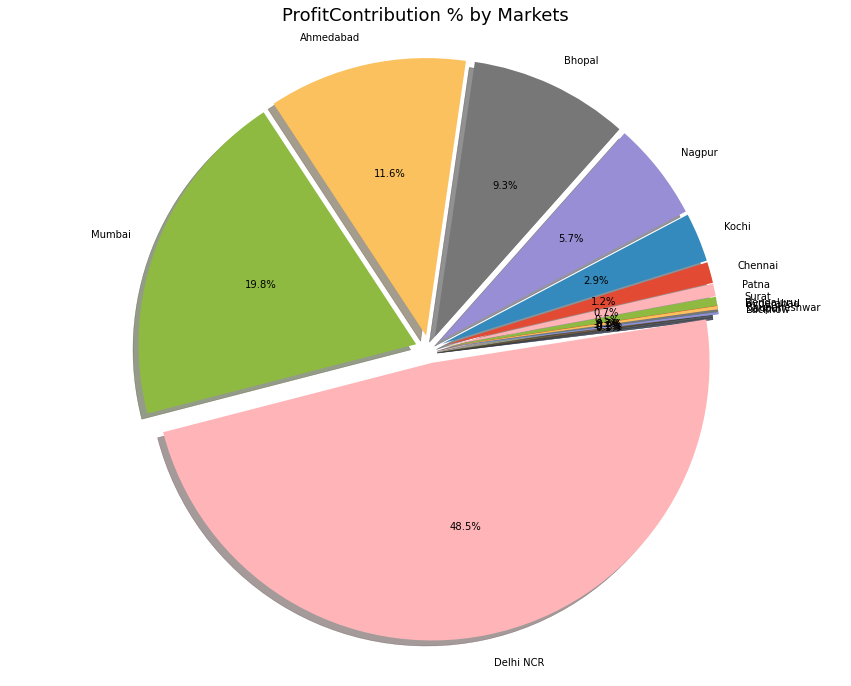

In [23]:
# same as above but in pie chart form

plt.figure(figsize=(15,12))
labels=list(profits_df['markets_name'])
sizes = list(profits_df['Profit Amount'])
#colors = ['#66b3ff','#ff9999','#ee4433','#ff8888','#dd3333','#ff4444','#a3a3a3']
explode = []
for i in labels:
    explode.append(0.05)

plt.pie(sizes, labels=labels,autopct='%1.1f%%', shadow=True, startangle=9, explode=explode )
plt.title("ProfitContribution % by Markets", fontsize=18)
plt.axis('equal')
plt.grid(True)
plt.savefig('plots/profit_contribution_%_by_markets.png')

### 6. Sales Quantity by Markets

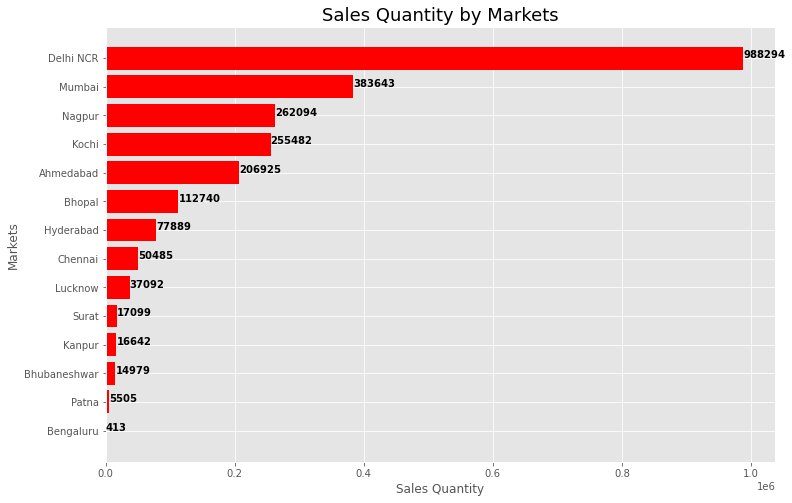

In [24]:
salesqty_df = df_new.groupby('markets_name')['sales_qty'].sum().reset_index(name='Sales Quantity').sort_values('Sales Quantity', ascending=True)

plt.figure(figsize=(12,8))
plt.barh(salesqty_df['markets_name'], salesqty_df['Sales Quantity'], color='red')
for i,v in enumerate(salesqty_df['Sales Quantity'].values):
  plt.text(v, i, str(v), fontweight='bold')
plt.title('Sales Quantity by Markets', fontsize=18)
plt.ylabel('Markets', fontsize=12)
plt.xlabel('Sales Quantity', fontsize=12)
plt.grid('True')
plt.savefig("plots/sales_qty_by_markets.png")
plt.show()

### 7. Sales Quantity by Market with customer type

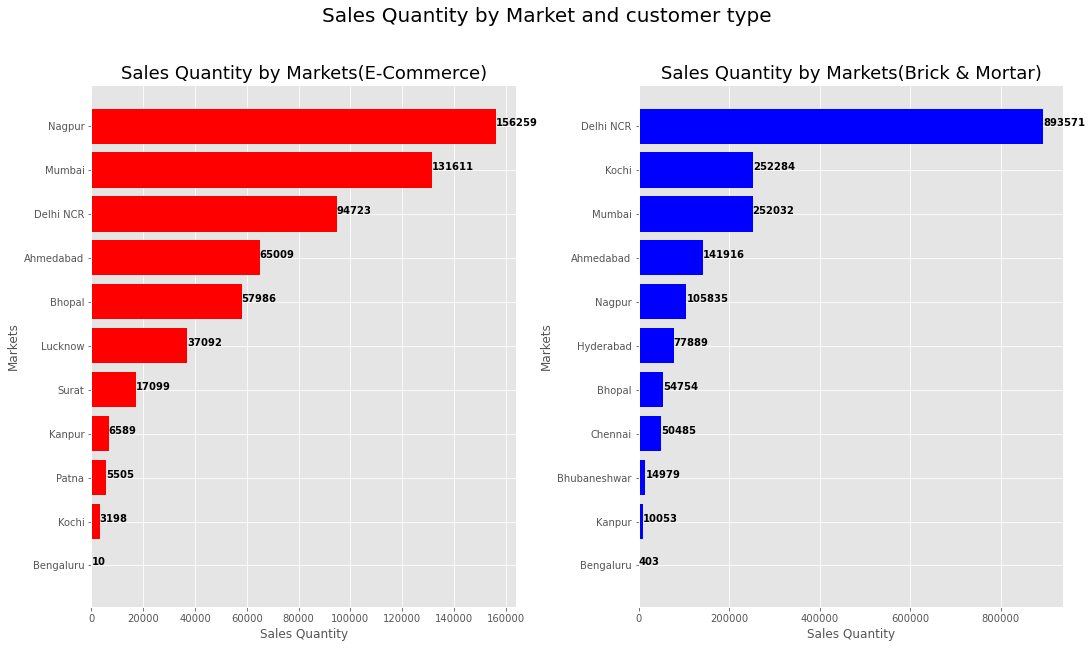

In [26]:
df = df_new.groupby(['markets_name','customer_type'])['sales_qty'].sum().reset_index(name='Sales Quantity').sort_values('Sales Quantity', ascending=True)
df1 = df[df['customer_type']=='E-Commerce']
df2 = df[df['customer_type']=='Brick & Mortar']

plt.figure(figsize=(15,8))
plt.suptitle('Sales Quantity by Market and customer type', y=1.1, fontsize=20)
plt.subplot(121)
plt.barh(df1['markets_name'], df1['Sales Quantity'], color='red')
for i,v in enumerate(df1['Sales Quantity'].values):
  plt.text(v, i, str(v), fontweight='bold')
plt.title('Sales Quantity by Markets(E-Commerce)', fontsize=18)
plt.ylabel('Markets', fontsize=12)
plt.xlabel('Sales Quantity', fontsize=12)
plt.grid('True')

plt.subplot(122)
plt.barh(df2['markets_name'], df2['Sales Quantity'], color='blue')
for i,v in enumerate(df2['Sales Quantity'].values):
  plt.text(v, i, str(v), fontweight='bold')
plt.title('Sales Quantity by Markets(Brick & Mortar)', fontsize=18)
plt.ylabel('Markets', fontsize=12)
plt.xlabel('Sales Quantity', fontsize=12)
plt.grid('True')
plt.savefig("plots/sales_qty_by_markets_&_custtype.png")
plt.tight_layout(0)
plt.show()

### 8. Revenue and Profit contribution by Customers

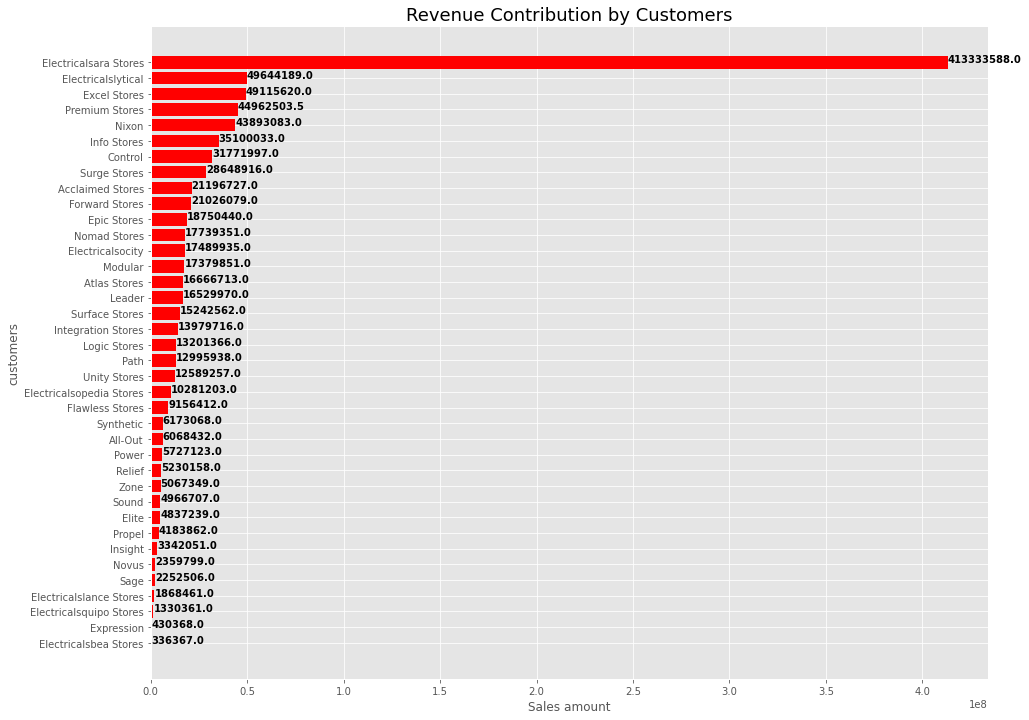

In [69]:
cust_df = df_new.groupby('custmer_name')['sales_amount'].sum().reset_index(name='sales amount').sort_values('sales amount',ascending=True)
plt.figure(figsize=(15,12))
plt.barh(cust_df['custmer_name'], cust_df['sales amount'], color='red')
for i,v in enumerate(cust_df['sales amount'].values):
  plt.text(v, i, str(v), fontweight='bold')
plt.title('Revenue Contribution by Customers', fontsize=18)
plt.ylabel('customers', fontsize=12)
plt.xlabel('Sales amount', fontsize=12)
plt.grid('True')
plt.savefig("plots/top5customers.png")
plt.show()

In [70]:
df = df_new.groupby('custmer_name').agg(
                                          Revenue= ('sales_amount','sum'),
                                          profit_margin = ('profit_margin','sum')
                                           )
df['Revenue Contribution %'] = round((df["Revenue"]*100)/sum(df['Revenue']),2)
df['profit margin %'] = round((df['profit_margin']*100)/sum(df['profit_margin']),2)
df['Revenue Contribution %'] = df['Revenue Contribution %'].astype(str)+'%'
df['profit margin %'] = df['profit margin %'].astype(str)+'%'
df.sort_values('Revenue', ascending=False)

,Revenue,profit_margin,Revenue Contribution %,profit margin %
custmer_name,,,,
Electricalsara Stores,413333588.0,9307899.35,41.97%,37.75%
Electricalslytical,49644189.0,1688260.00,5.04%,6.85%
Excel Stores,49115620.0,679991.13,4.99%,2.76%
Premium Stores,44962503.5,1053784.09,4.57%,4.27%
Nixon,43893083.0,1785811.39,4.46%,7.24%
Info Stores,35100033.0,314450.95,3.56%,1.28%
Control,31771997.0,825928.10,3.23%,3.35%
Surge Stores,28648916.0,656033.08,2.91%,2.66%
Acclaimed Stores,21196727.0,321095.18,2.15%,1.3%


### 8. Top 5 products

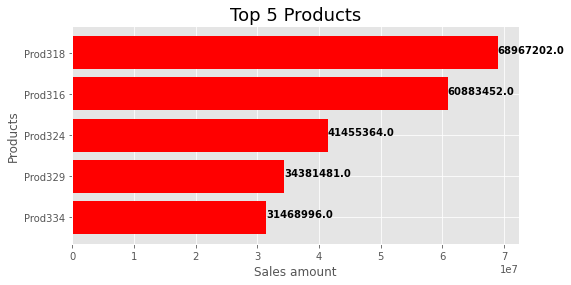

In [71]:
prod_df = df_new.groupby('product_code')['sales_amount'].sum().reset_index(name='sales amount').sort_values('sales amount',ascending=True)
top5product = prod_df.tail()
plt.figure(figsize=(8,4))
plt.barh(top5product['product_code'], top5product['sales amount'], color='red')
for i,v in enumerate(top5product['sales amount'].values):
  plt.text(v, i, str(v), fontweight='bold')
plt.title('Top 5 Products', fontsize=18)
plt.ylabel('Products', fontsize=12)
plt.xlabel('Sales amount', fontsize=12)
plt.grid('True')
plt.savefig("plots/top5products.png")
plt.show()

### 9. Sales trend by year_month and sales by year

c:\python\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\python\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0, flags=flags)


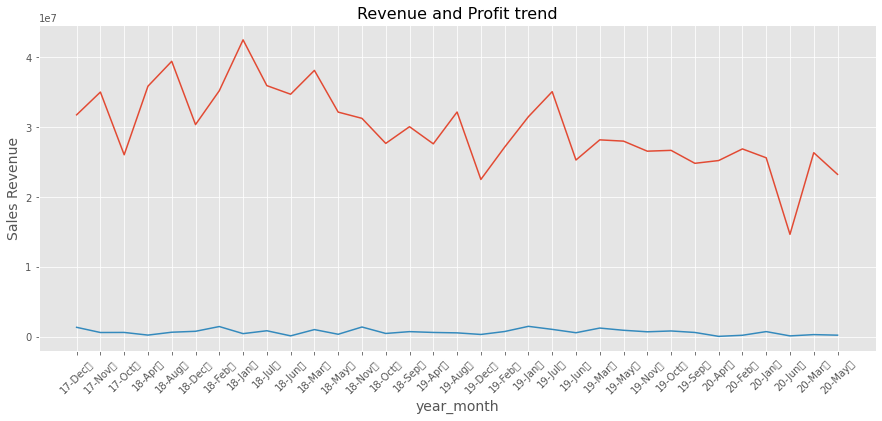

In [72]:
df = pd.merge(transactions, date, left_on='order_date', right_on='date')

df1 = df.groupby('date_yy_mmm').agg(
                                     Revenue = ('sales_amount','sum'),
                                     profit_margin = ('profit_margin','sum'))
plt.figure(figsize=(15,6))
plt.plot(df1.index, df1['Revenue'], label='Revenue')
plt.plot(df1.index, df1['profit_margin'], label='profit')
plt.title('Revenue and Profit trend', fontsize=16)
plt.xlabel('year_month', fontsize=14)
plt.ylabel('Sales Revenue', fontsize=14)
plt.xticks(rotation=45)
plt.savefig('plots/sales_trend.png')
plt.show()

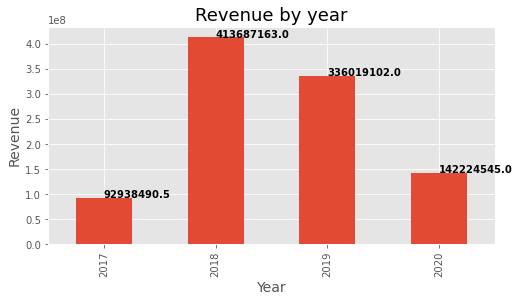

In [73]:

df2 = df.groupby('year').agg(
                                     Revenue = ('sales_amount','sum'),
                                     profit_margin = ('profit_margin','sum'))

plt.figure(figsize=(8,4))
for i,v in enumerate(df2['Revenue'].values):
    plt.text(i,v, str(v), fontweight='bold')
df2['Revenue'].plot(kind='bar')
plt.title('Revenue by year', fontsize=18)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Revenue',fontsize=14)
plt.savefig('plots/revenue_by_year.png')
plt.show()